### Prudhviraj Tirumanisetti
EE 258
ID:011489881

# Part 2: Exploratory Data Analysis and Visualization (40 points)
In this part of the assignment we'll do some basic exploratory data analysis, such as computing dataset statistics and plotting figures to better understand the data.

In [2]:
## Preliminaries

#Show plots in the notebook
%matplotlib inline

# To start we import some prerequisites
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib2

In [3]:
# Let's load the Iris dataset again, but this time using pandas
iris_data = urllib2.urlopen("https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv");
iris = pd.read_csv(iris_data, quotechar='"', skipinitialspace=True);

## Question 1: Descriptive Statistics (10 points)
You can learn a little more about using pandas for exploratory data analysis at [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

1.    There's a single pandas function that will compute the min, max, mean, median, standard deviation and quartiles of the dataset -- what is it?    (Hint: 
2.    Report the min, max, mean, median, standard deviation and quartiles for each attribute of the Iris dataset




1. describe() 
2. Report the min, max, mean, median, std and quartiles
              SepalLength SepalWidth PetalLength PetalWidth
        min -     4.3         2          1          0.1
        max -     7.9         4.4        6.9        2.5
        mean -    5.8         3.1        3.8        1.2
        median -  5.8         3          4.35       1.3
        std -     0.828       0.434      1.764      0.763
        Q1 -      5.1         2.8        1.6        0.3
        Q3 -      6.4         3.3        5.1        1.8

In [4]:
# Question 1 code
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Unboxing boxplots
Now let's look at some plots of the Iris data.  We can start with the boxplot, which will summarize some of the key data statistics you just derived. Guess what the command is to get a boxplot? If you guessed `boxplot()`, you're right. You can find more documentation [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot)

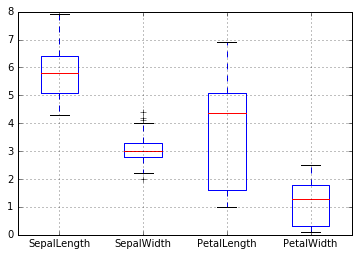

In [5]:
#If you get rid of "return_type='axes'" you'll get a warning, but it will still work
iris.boxplot(return_type='axes')


## Question 2: Boxplots (10 points)
Create three different data frames, one for each of the classes in the Iris dataset (setosa, versicolor, and virginica) and produce a boxplot for each target class.

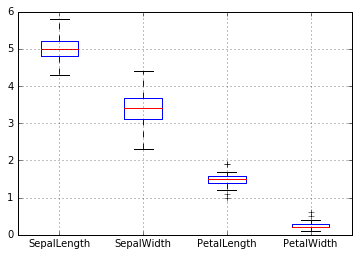

In [6]:
# Iris-setosa boxplot
iris_setosa = iris[iris.Name == 'Iris-setosa']
iris_setosa.boxplot(return_type='axes')


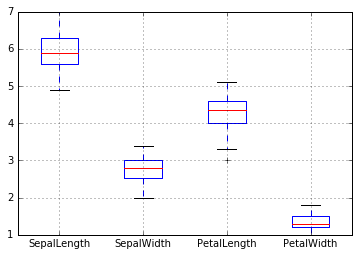

In [7]:
# Iris-versicolor boxplot
iris_versicolor = iris[iris.Name == 'Iris-versicolor']
iris_versicolor.boxplot(return_type='axes')

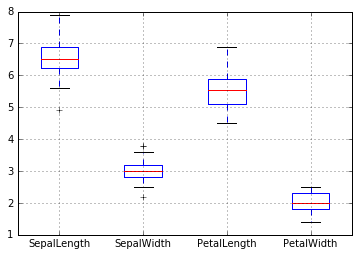

In [8]:
# Iris-virginica boxplot
iris_virginica = iris[iris.Name == 'Iris-virginica']
iris_virginica.boxplot(return_type='axes')

## Histogramming
Now let's move on to another basic type of plot - the histogram. As you might expect, there's a straightforward function in pandas for this as well -- `hist()` and you can find more documentation [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Let's make histograms for each of the four features in the boxplot.

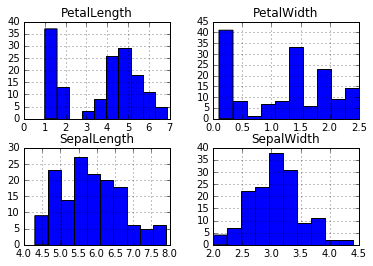

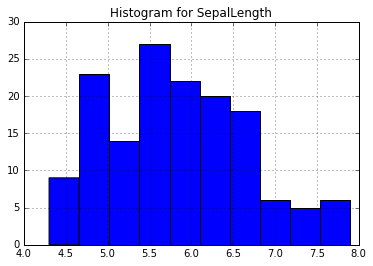

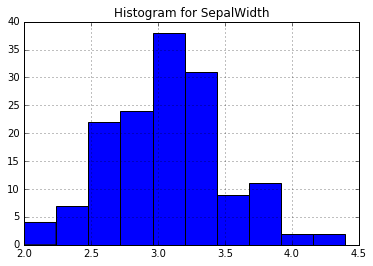

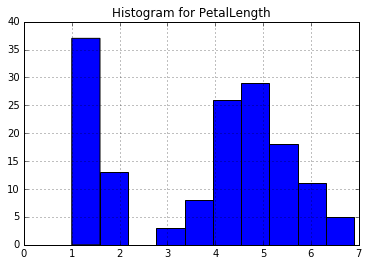

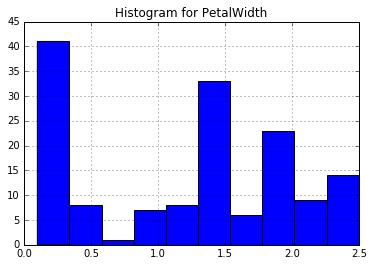

In [9]:
# Iterate over the features:
for column_id in range(4): #iterate over the first four columns
    plt.figure() #start a new figure for this histogram
    column_name = iris.columns[column_id] #get the name of the column
    plt.title("Histogram for "+column_name) #title the plot
    iris[column_name].hist() #create a histogram
    
    

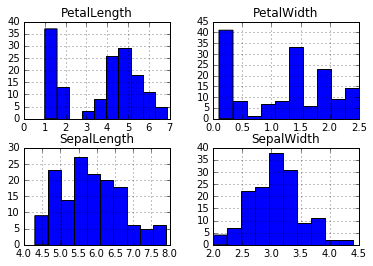

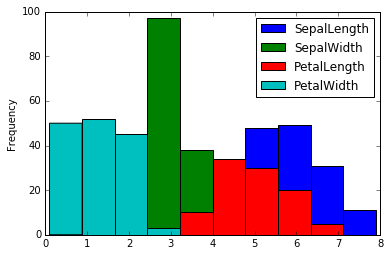

In [37]:
#Let's look at two other ways to make histograms in pandas
#First, calling hist on the data directly will generate a figure with each histogram in a subfigure:
iris.hist()
#Next, calling the plot function on the pandas DataFrame with argument "kind='hist'" 
# produces a messier histogram with all the features overlayed in different colors
plt.figure()
iris.plot(kind='hist')

## Question 3: Histograms (10 points)
Generate a histogram for SepalLength that overlays the bars for each of the three classes

Name
Iris-setosa        Axes(0.125,0.125;0.775x0.775)
Iris-versicolor    Axes(0.125,0.125;0.775x0.775)
Iris-virginica     Axes(0.125,0.125;0.775x0.775)
Name: SepalLength, dtype: object

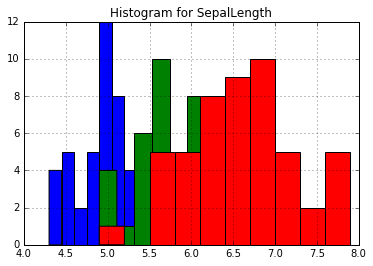

In [38]:
plt.figure()
column_name = iris.columns[0] #get the name of the column
plt.title("Histogram for "+column_name) # title theplot
iris.groupby("Name").SepalLength.hist()

## Scatterplots
Let's look at one last type of plot: the scatterplot (read more [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)). Let's look at the correlation between sepal length and width in our data.

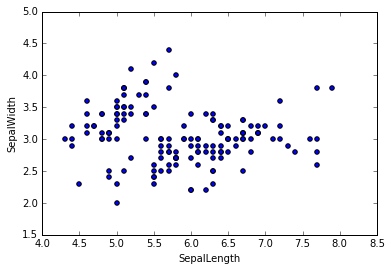

In [39]:
#scatter isn't supported automatically by pandas as boxplot() and hist() were, so we use the plot() function
iris.plot(kind='scatter', x='SepalLength', y='SepalWidth')
#Another way to do this is directly from matplotlib:
#plt.scatter(iris['SepalLength'].values, iris['SepalWidth'].values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112a3f350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111c81b10>]], dtype=object)

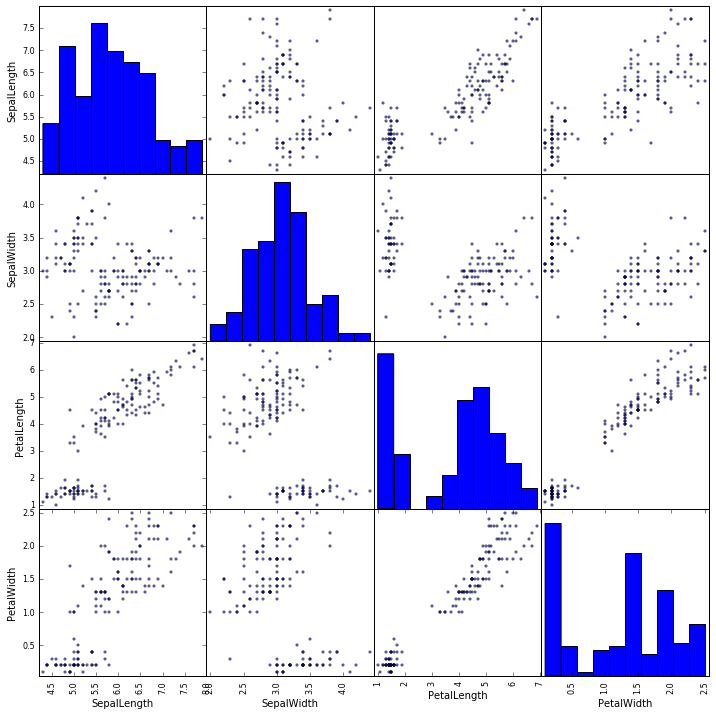

In [40]:
#And just for fun, let's replicate figure 2.15 from the reading
pd.scatter_matrix(iris, figsize=(12,12))

## Question 4: Scatterplots (10 points)
1.    Generate a scatter plot of PetalLength versus PetalWidth.
2.    For both PetalLength/Width and SepalLength/Width plots, color the points in the scatter plot by the target label


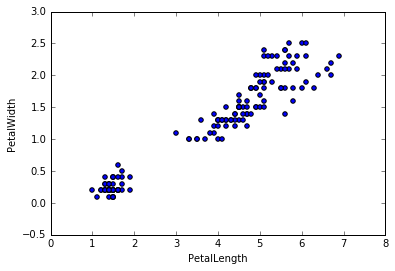

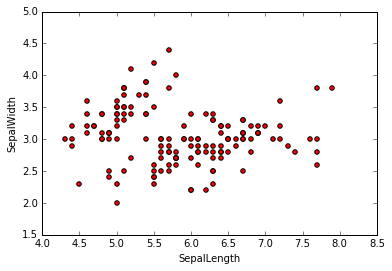

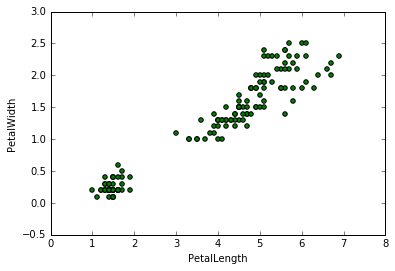

In [41]:
# 1
iris.plot(kind='scatter', x='PetalLength', y='PetalWidth')

# 2
iris.plot(kind='scatter', x='SepalLength', y='SepalWidth', c='red')
iris.plot(kind='scatter', x='PetalLength', y='PetalWidth', c='green')

## Extra Credit (10 points)
Look at the [pandas visualization documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html) and generate two other plots on the Iris dataset. 

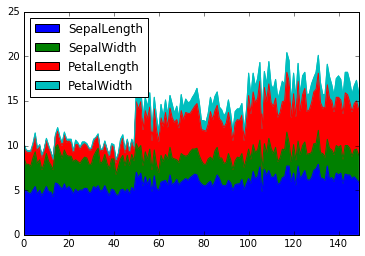

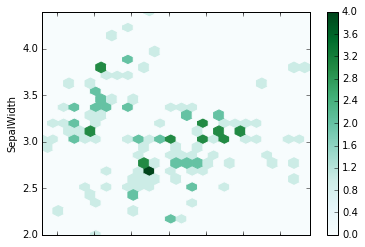

In [42]:
# Extra Credit 
# Add two other visualization graphs on the data
iris.plot(kind='area')
iris.plot(kind='hexbin', x='SepalLength', y='SepalWidth', gridsize=25)